In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Check that the database file exists, otherwise get it
if not os.path.exists('../data/intact.txt'):
    link = 'ftp://ftp.ebi.ac.uk/pub/databases/intact/current/psimitab/intact.zip'
    os.system('wget '+link)
    os.system('unzip intact.zip')
    os.system('mv intact.txt ../data')
    os.system('mv intact_negative.txt ../data')
    os.system('rm intact.zip')

In [3]:
# Read intact database data file
with open('../data/intact.txt') as txt:
    lines = txt.readlines()

In [4]:
# Select the entry type you want to analyse
s = 'Host organism(s)'

In [5]:
# Gather all the entry types into a dictionary as empty lists
data = {}
for l in lines[:1]:
    entries = [e.replace('#','') for e in l.split('\t')]
    for e in entries:
#         print(e) # Uncomment to print the full list of options
        if e == s:
            data[e] = []

In [6]:
# Gather all the values inside each entry and store them in lists
for l in lines:
    for i,e in enumerate(entries):
        value = l.split('\t')[i]
        if e == s:
            value = value.split('(')[-1].split(')')[0].capitalize()
            data[e].append(value)
        
# Convert the lists to numpy arrays (not sure if necessary)
for e in data:
    data[e] = np.array(data[e])
    
# Convert the dictionary into a pandas data frame
data = pd.DataFrame(data)

In [7]:
# Filter to put count values larger than N:
N = 5000
mc1 = data[data.groupby(s)[s].transform('size') > N]

Text(0, 0.5, 'N of entries')

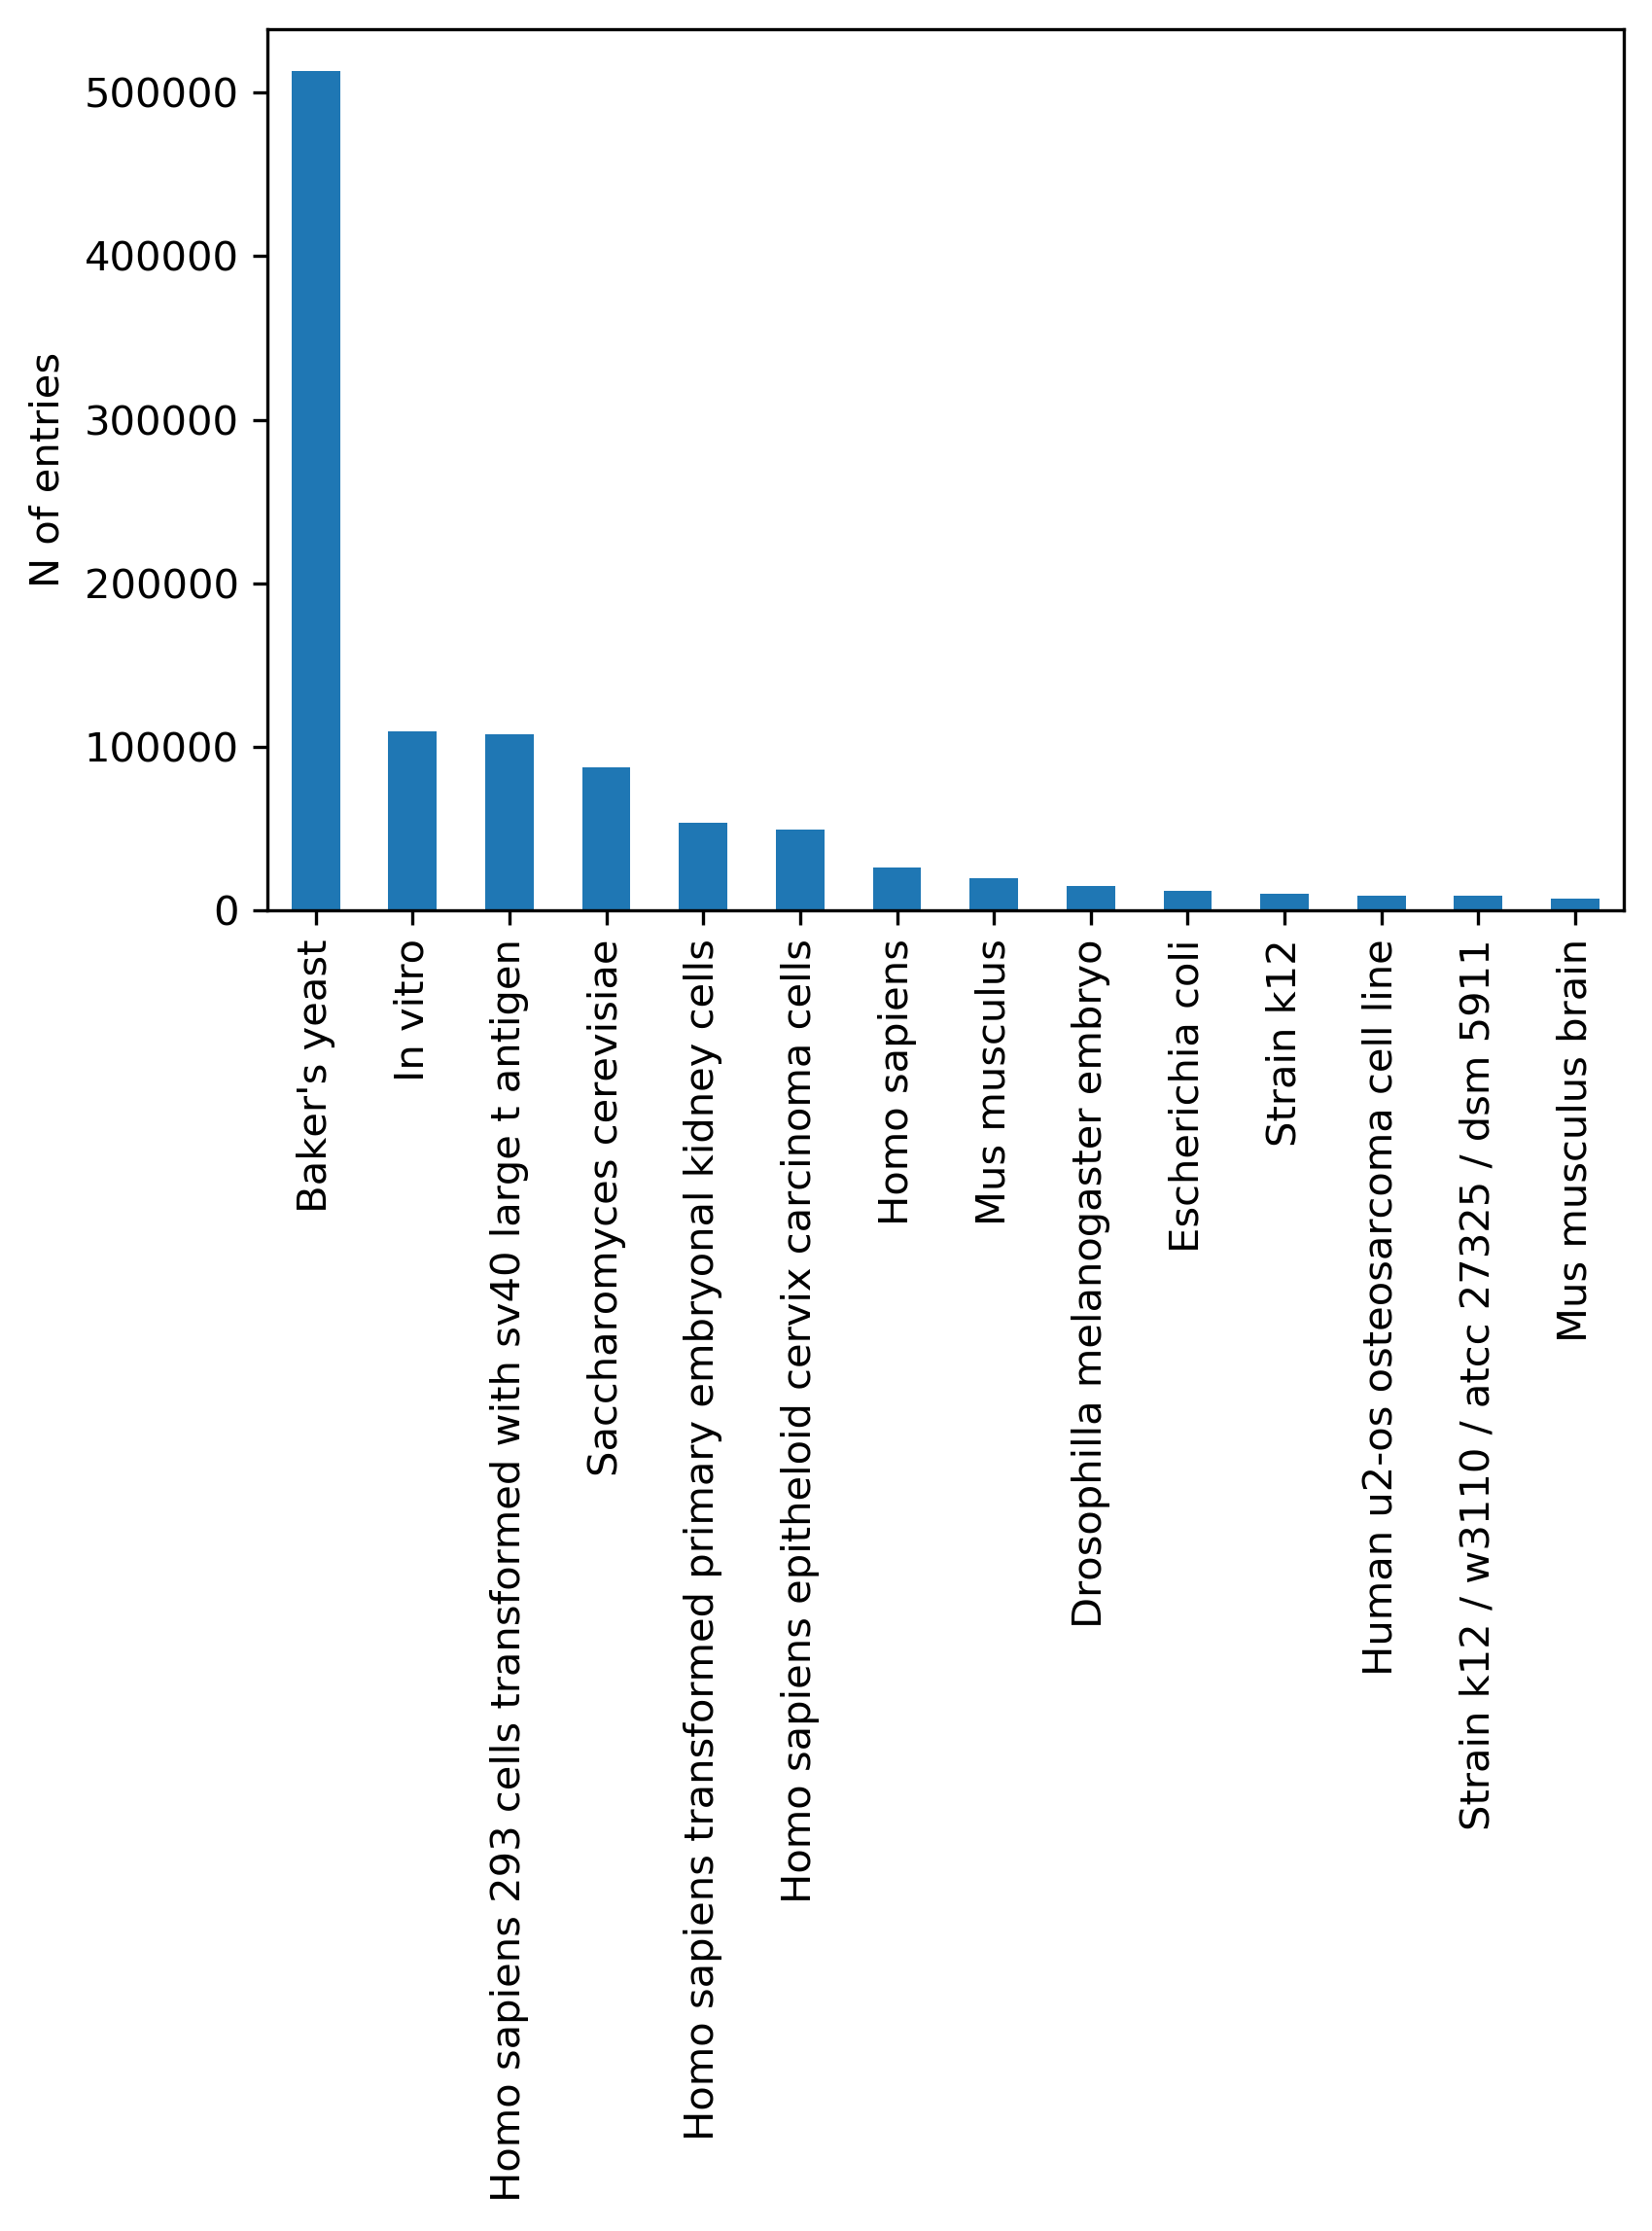

In [8]:
plt.figure(dpi=300)
mc1[s].value_counts().plot(kind='bar')
plt.ylabel('N of entries')
# plt.savefig('host_organisms_counts.pdf') # Save to file